# Additional utilities and plots

In this notebook we show some additional utilities and plots for manipulation of spectrograms.


## 1. Imports

First we import the library of functions.

In [4]:
from utilities_store import *

## 2. Obtain spectrogram of the signal

First we obtain the spectrogram of the signal.

In [30]:
spectrogram, signal = get_spectrogram('/musescore/HALFTONES/C5F.wav', N = 500, step_size = 250, 
                                          power_threshold = 1e-9, amp_threshold = 1e-8)

Progress: 0.00%
Progress: 0.06%
Progress: 0.12%
Progress: 0.18%
Progress: 0.24%
Progress: 0.31%
Progress: 0.37%
Progress: 0.43%
Progress: 0.49%
Progress: 0.55%
Progress: 0.61%
Progress: 0.67%
Progress: 0.73%
Progress: 0.80%
Progress: 0.86%
Progress: 0.92%
Progress: 0.98%
Progress: 1.04%
Progress: 1.10%
Progress: 1.16%
Progress: 1.22%
Progress: 1.29%
Progress: 1.35%
Progress: 1.41%
Progress: 1.47%
Progress: 1.53%
Progress: 1.59%
Progress: 1.65%
Progress: 1.71%
Progress: 1.77%
Progress: 1.84%
Progress: 1.90%
Progress: 1.96%
Progress: 2.02%
Progress: 2.08%
Progress: 2.14%
Progress: 2.20%
Progress: 2.26%
Progress: 2.33%
Progress: 2.39%
Progress: 2.45%
Progress: 2.51%
Progress: 2.57%
Progress: 2.63%
Progress: 2.69%
Progress: 2.75%
Progress: 2.81%
Progress: 2.88%
Progress: 2.94%
Progress: 3.00%
Progress: 3.06%
Progress: 3.12%
Progress: 3.18%
Progress: 3.24%
Progress: 3.30%
Progress: 3.37%
Progress: 3.43%
Progress: 3.49%
Progress: 3.55%
Progress: 3.61%
Progress: 3.67%
Progress: 3.73%
Progress

In [31]:
import serialization as ser

ser.to_csv(spectrogram)

Writing csv...Done.


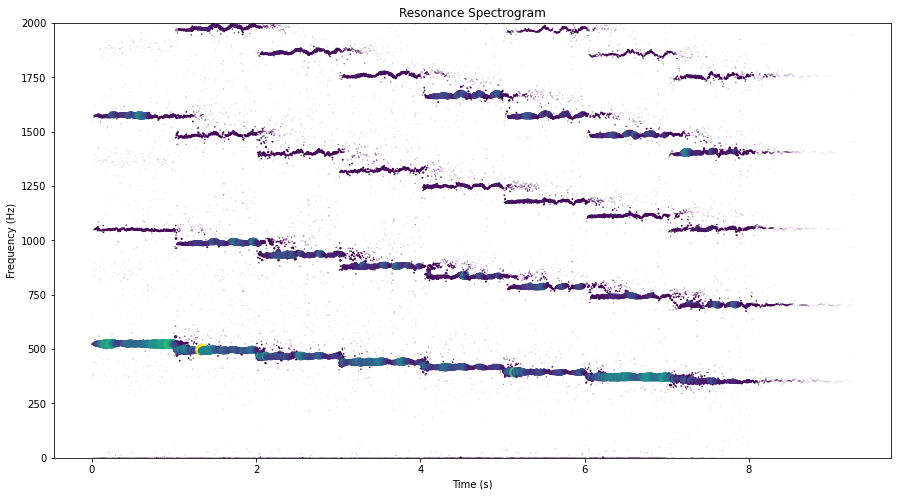

In [32]:
plot_spectrogram(spectrogram, max_freq = 2000, scale=100)

## 3. Fundamental frequency estimation

Obtain the fundamental frequency of a signal and plot it in the orginal resonance spectrogram.

The fundamental frequency of a signal is estimated by calculating the 'harmonicity' of each resonance and selecting the resonance with the highest harmonicity of each spectrum. The harmonicty of a resonance is calculated by summing the power of all the resonances that are close (defined ratio) to an integer multiple of the resonance for which we calculate the harmonicity.

In [ ]:
f0 = get_f0(spectrogram)


Plot the fundamental frequency.

In [ ]:
plot_f0(spectrogram, f0, max_freq = 2000)

In [ ]:
#f1 = get_f1(spectrogram) # TODO: Write a function to get first overtone maybe?

## 4. Arrows plot

Function to plot the original spectrogram using symbols to represent positive (triangle), negative (inverted triangle) and 'constant' (circle) decays.

- Circle: - 5 < Decay < 5
- Triangle: Decay > 5
- Inverted triangle: Decay < - 5

In [ ]:
plot_spectrogram_arrows(spectrogram, min_freq = 0, max_freq = 2000)

## 5. Densities

Finally we show the use of the density functions to obtain the continuous and discrete density spectrograms.

The density is calculated using the next formula:
<br>
<br>
$\large\sum_{n = 1}^{N} G(n) \cdot  \sum_{k = 1}^{K} \frac{\pi |d_{k}|^{2}}{\gamma_{k}} \cdot V (\eta - \phi{_k}; \gamma{_k}, \sigma ) $
<br>

Where:

- $ n $ indexes the contiguous slices (spectra) with center in the slice (spectrum) where we want to obtain the density.
- $ G(x) $ is the Gaussian window.
- $ k $ indexes the resonances of the corresponding slice (spectrum)
- $ d_{k}$ is the decay of the k resonance
- $ \gamma_{k}$ is the imaginary part of the complex frequency of the k resonance
- $ V(x; \sigma, \gamma) $ is the Voigt profile.
- $ \eta $ is the angular frequency of the evaluation point
- $ \phi_{k} $ is the angular frequency of the k resonance
- $ \sigma $ is the standard deviation of the Voigt profile (inner Gaussian window)

This density formula can be applied to obtain the density of any point in the spectrgram.

### 5.1 Continuous density spectrogram

The continuous density is calculated for each evenly spaced point in frequency (determined by the precision argument) for each window (slice) of the spectrogram.

In [ ]:
cont_density = continuous_density_spectrogram(spectrogram, min_freq = 0, max_freq = 5000, slices_overlap = 7, 
                                              freq_overlap = 200, precision = 500)

In [ ]:
plot_continuous_density_spectrogram(cont_density, spectrogram, precision = 500, min_freq = 0, 
                                    max_freq = 5000, threshold = 0)

### 5.2 Discrete density spectrogram

The discrete density is calculated for each resonance of the spectrogram.

In [ ]:
discrete_density = discrete_density_spectrogram(spectrogram, slices_overlap = 7, freq_overlap = 200)

In [ ]:
plot_discrete_density_spectrogram(discrete_density, spectrogram, max_freq = 5000, threshold = 0)